In [17]:
import json
import numpy as np

def load_json(filepath):
    with open(filepath, 'r') as f:
        data = json.load(f)
    return data ## I'll make this loop through but for now

def extract_joint_positions(json_data):
    positions = []
    for frame in json_data['tracking']:
        player_data = frame['data']['player']
        
        r_shoulder = np.array(player_data['R_SHOULDER'])
        r_elbow = np.array(player_data['R_ELBOW'])
        r_wrist = np.array(player_data['R_WRIST'])

        positions.append((r_shoulder, r_elbow, r_wrist)) ## Should probably save this as a np.array but this works for now
    
    return positions

def frame_to_rotation(vector1, vector2):
    vector1 = vector1 / np.linalg.norm(vector1)
    vector2 = vector2 / np.linalg.norm(vector2)

    cross_prod = np.cross(vector1, vector2)
    cos = np.dot(vector1, vector2)
    sin = np.linalg.norm(cross_prod)

    kmat = np.array([[0, -cross_prod[2], cross_prod[1]], 
                     [cross_prod[2], 0, -cross_prod[0]], 
                     [-cross_prod[1], cross_prod[0], 0]])
    
    rotation_matrix = np.eye(3) + sin*kmat + (1-cos)*kmat.dot(kmat)

    return rotation_matrix


## Need to define a reference vector


def all_rot(vectors, reference_vector):
    rotation_matrices = []
    
    for upper_arm_vector, _ in vectors: ## each frame
        rotation_matrix = frame_to_rotation(reference_vector, upper_arm_vector)
        rotation_matrices.append(rotation_matrix)
    
    return rotation_matrices


def angle_retrieval(vectors): ## I'll fix this later
    joint_angles = []
    for shoulder_elbow, elbow_wrist in vectors:
        cos_theta = np.dot(shoulder_elbow, elbow_wrist) / (np.linalg.norm(shoulder_elbow) * np.linalg.norm(elbow_wrist))
        elbow_angle = np.arccos(np.clip(cos_theta, -1.0, 1.0))
        joint_angles.append(elbow_angle)
    return joint_angles








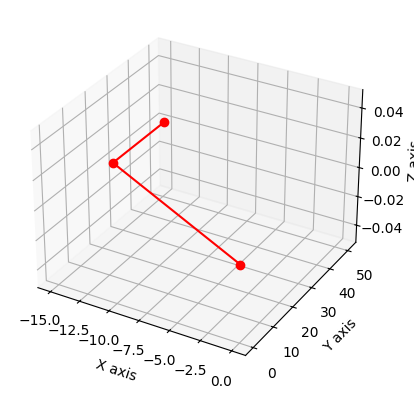

In [16]:
\